In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score
import warnings

In [2]:
df = pd.read_csv('../../65 Years of Weather Data Bangladesh (1948 - 2013).csv')
df.head()

,No,Station_Names,YEAR,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01


In [3]:
print(df['Station_Names'].unique())

['Barisal' 'Bhola' 'Bogra' 'Chandpur' 'Chittagong (City-Ambagan)'
 'Chittagong (IAP-Patenga)' 'Chuadanga' 'Comilla' "Cox's Bazar" 'Dhaka'
 'Dinajpur' 'Faridpur' 'Feni' 'Hatiya' 'Ishurdi' 'Jessore' 'Khepupara'
 'Khulna' 'Kutubdia' 'Madaripur' 'Maijdee Court' 'Mongla' 'Mymensingh'
 'Patuakhali' 'Rajshahi' 'Rangamati' 'Rangpur' 'Sandwip' 'Satkhira'
 'Sitakunda' 'Srimangal' 'Syedpur' 'Sylhet' 'Tangail' 'Teknaf']


In [4]:

# Players to be selected
li = ["Chittagong (City-Ambagan)","Chittagong (IAP-Patenga)","Sandwip","Sitakunda","Kutubdia","Cox's Bazar","Teknaf","Sylhet","Srimangal"]
 
df_new=df[df.Station_Names.isin(li)]
df_new

,No,Station_Names,YEAR,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
2748,2784,Chittagong (City-Ambagan),2009,1,31.566667,13.7,0.000000,70.333333,3.033333,0.1,6.411131,41977,0.0,0.0,22.35,91.8166,0,2009.01
2749,2748,Chittagong (City-Ambagan),2011,1,32.400000,13.5,0.000000,67.000000,2.800000,0.9,6.411131,41977,0.0,0.0,22.35,91.8166,0,2011.01
2750,2749,Chittagong (City-Ambagan),2012,1,30.700000,14.9,0.000000,75.000000,3.300000,1.5,6.411131,41977,0.0,0.0,22.35,91.8166,0,2012.01
2751,2750,Chittagong (City-Ambagan),2013,1,31.600000,12.7,0.000000,69.000000,3.000000,0.3,6.411131,41977,0.0,0.0,22.35,91.8166,0,2013.01
2752,2785,Chittagong (City-Ambagan),2009,2,34.833333,16.7,0.333333,62.333333,3.166667,0.7,6.411131,41977,0.0,0.0,22.35,91.8166,0,2009.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21115,21115,Teknaf,2009,12,30.300000,16.5,0.000000,72.000000,2.800000,0.9,8.700000,41998,734765.4,308914.1,20.87,92.2600,4,2009.12
21116,21116,Teknaf,2010,12,31.700000,16.7,193.000000,79.000000,2.400000,1.4,5.500000,41998,734765.4,308914.1,20.87,92.2600,4,2010.12
21117,21117,Teknaf,2011,12,31.500000,16.4,0.000000,73.000000,0.000000,1.5,7.400000,41998,734765.4,308914.1,20.87,92.2600,4,2011.12
21118,21118,Teknaf,2012,12,30.000000,15.8,0.000000,70.000000,1.800000,0.2,9.000000,41998,734765.4,308914.1,20.87,92.2600,4,2012.12


In [5]:
df_new.shape

(5016, 18)

In [6]:
df_new=df_new.drop(labels=["No","Station_Names","YEAR","Month","ALT","Station_Number"], axis=1)
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,X_COR,Y_COR,LATITUDE,LONGITUDE,Period
2748,31.566667,13.7,0.000000,70.333333,3.033333,0.1,6.411131,0.0,0.0,22.35,91.8166,2009.01
2749,32.400000,13.5,0.000000,67.000000,2.800000,0.9,6.411131,0.0,0.0,22.35,91.8166,2011.01
2750,30.700000,14.9,0.000000,75.000000,3.300000,1.5,6.411131,0.0,0.0,22.35,91.8166,2012.01
2751,31.600000,12.7,0.000000,69.000000,3.000000,0.3,6.411131,0.0,0.0,22.35,91.8166,2013.01
2752,34.833333,16.7,0.333333,62.333333,3.166667,0.7,6.411131,0.0,0.0,22.35,91.8166,2009.02


<AxesSubplot:xlabel='Wind_Speed', ylabel='count'>

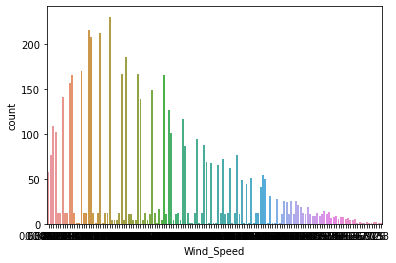

In [7]:
import seaborn as sns
sns.countplot(x = "Wind_Speed", data = df_new)

In [8]:
z = df_new["Wind_Speed"]

df_new = df_new.drop(labels=["Wind_Speed"], axis=1)
df_new['Wind_Speed'] = z
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,Bright_Sunshine,X_COR,Y_COR,LATITUDE,LONGITUDE,Period,Wind_Speed
2748,31.566667,13.7,0.000000,70.333333,0.1,6.411131,0.0,0.0,22.35,91.8166,2009.01,3.033333
2749,32.400000,13.5,0.000000,67.000000,0.9,6.411131,0.0,0.0,22.35,91.8166,2011.01,2.800000
2750,30.700000,14.9,0.000000,75.000000,1.5,6.411131,0.0,0.0,22.35,91.8166,2012.01,3.300000
2751,31.600000,12.7,0.000000,69.000000,0.3,6.411131,0.0,0.0,22.35,91.8166,2013.01,3.000000
2752,34.833333,16.7,0.333333,62.333333,0.7,6.411131,0.0,0.0,22.35,91.8166,2009.02,3.166667


In [9]:
X = df_new.iloc[:,:-1]
Y = df_new.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

In [11]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [12]:
# MLPRegressor

from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 250,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(trainX_scaled, trainY)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=250)

In [13]:
y_pred = mlp_reg.predict(testX_scaled)
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
19156,0.800000,0.262327
21104,0.300000,0.540064
4810,2.261111,2.569566
18502,0.300000,0.218227
18242,0.500000,0.468436


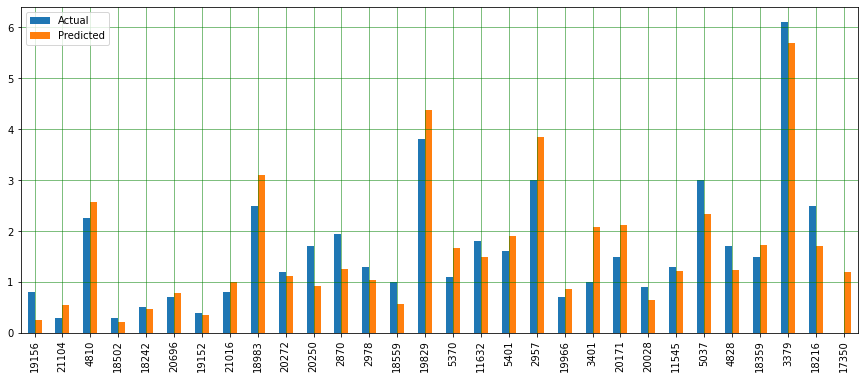

In [14]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(15,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

Text(0, 0.5, 'Cost')

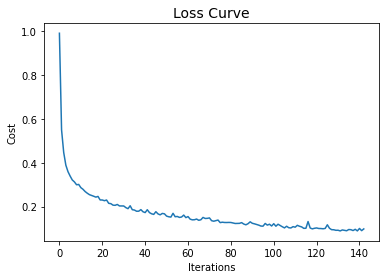

In [15]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [16]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 0.4400209668991091
Mean Squared Error: 0.3912632722402287
Root Mean Squared Error: 0.6255104093779965


In [17]:
from sklearn.metrics import r2_score
score= r2_score(testY,y_pred)
score

0.7689825586117076

In [18]:
# Hyper Parameter Tuning
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [19]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
grid_predictions = grid.predict(testX_scaled) 
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
19156,0.800000,0.605510
21104,0.300000,0.505227
4810,2.261111,2.075796
18502,0.300000,0.225531
18242,0.500000,1.108030


In [21]:
grid_predictions = grid.predict(testX_scaled) 
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
19156,0.800000,0.605510
21104,0.300000,0.505227
4810,2.261111,2.075796
18502,0.300000,0.225531
18242,0.500000,1.108030


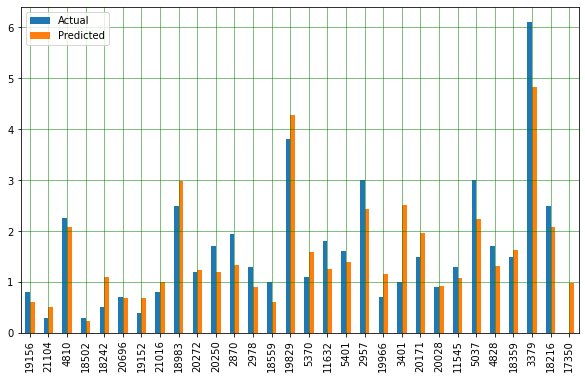

In [22]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [23]:
from sklearn.metrics import r2_score
score= r2_score(testY,grid_predictions)
score

0.7703928441800936

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, grid_predictions)))

Mean Absolute Error: 0.4453371276566572
Mean Squared Error: 0.3888747385305492
Root Mean Squared Error: 0.6235982188320852
